In [8]:
from fastai.vision.all import *
path = '/home/kako/.fastai/data/flowers'


flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=43),
    get_y=parent_label,
    item_tfms=Resize(460))
dls = flowers.dataloaders(path, batch_size=4)

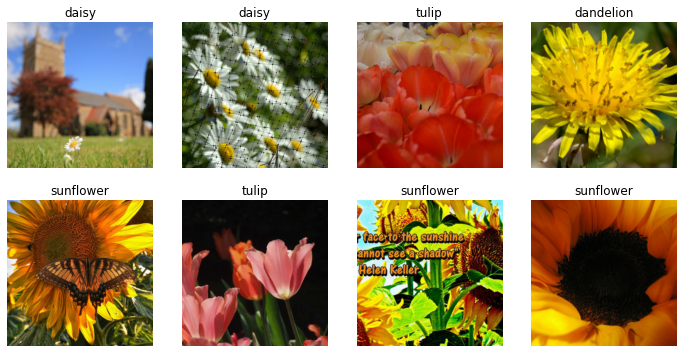

In [36]:
dls.valid.show_batch(max_n=8, nrows=2)

In [38]:
doc(learn.fine_tune)

In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/kako/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.032666,1.315665,0.469907,00:10


epoch,train_loss,valid_loss,error_rate,time
0,1.469800,1.185591,0.421296,00:10


In [2]:
import torch
torch.cuda.empty_cache()

learn50 = cnn_learner(dls, resnet50, metrics=error_rate)
learn50.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.971596,0.652387,0.172454,01:23


epoch,train_loss,valid_loss,error_rate,time
0,0.435251,0.435018,0.129630,01:52
1,0.308886,0.435702,0.122685,01:44
2,0.236947,0.471758,0.125000,01:41
3,0.171108,0.438421,0.106481,01:40
4,0.114061,0.444298,0.099537,01:41
5,0.075700,0.496841,0.108796,01:41
6,0.044198,0.439791,0.096065,01:42
7,0.029367,0.442878,0.098380,01:41
8,0.021030,0.439858,0.101852,01:41
9,0.017860,0.424504,0.098380,01:43


In [9]:
learn34 = cnn_learner(dls, resnet34, metrics=error_rate)
learn34.fine_tune(15)

RuntimeError: CUDA out of memory. Tried to allocate 14.00 MiB (GPU 0; 3.95 GiB total capacity; 2.70 GiB already allocated; 32.38 MiB free; 2.74 GiB reserved in total by PyTorch)

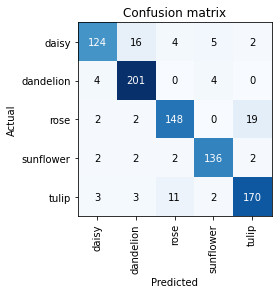

In [3]:
interp = ClassificationInterpretation.from_learner(learn50)
interp.plot_confusion_matrix()

In [27]:
import ipywidgets as widgets
btn_upload = widgets.FileUpload()

In [28]:
btn_upload

FileUpload(value={}, description='Upload')

In [32]:
img = PILImage.create(btn_upload.data[0])
pred,pred_idx,probs = learn.predict(img)
lbl_pred = widgets.Label() 
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: rose; Probability: 0.9875')

In [31]:
results

('rose',
 tensor(2),
 tensor([2.3373e-03, 2.3590e-04, 9.8752e-01, 6.8137e-05, 9.8408e-03]))

In [ ]:
import 